## 의사결정나무(DT)
- IF-ELSE 방식의 질문에 대한 답변으로 문제를 해결하는 알고리즘
- 피쳐(특성) 중에서 선택한 기준으로 데이터 분할
    - 엔트로피 (불순 정도) => 낮아지는 방향
    - 정보이득 : 1-엔트로피 => 높아지는 방향
    - 지니계수 : 불평등수치값 => 낮아지는 방향
- 단점 : 과대적합이 될 가능성 높음! 성능이 좋지 않음
- 장점 : 전처리 영향을 받지 않음 / 직관성이 높음 / 피쳐들 중 주요 피쳐 확인 가능
- 주의
    - 여기서의 주요 피쳐는 데이터 분할을 위한 주요 피쳐
    - 100% 데이터의 주요 피쳐가 아닐 수도 있음 => 다른 검사(상관계수, 시각화)

### [1] 모듈 로딩 및 데이터 준비

In [2]:
import pandas as pd
import numpy as np

irisDF = pd.read_csv('../data/iris.csv')
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### [2] 학습용 데이터 셋 준비

#### [2-1] 피쳐와 타겟 분리

In [9]:
featureDF = irisDF[irisDF.columns[:4]]
featureDF

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
targetSR = irisDF.species
targetSR

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

#### [2-2] 훈련용과 테스트용 데이터셋 분리

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    stratify=targetSR)

## [3] 기계학습 진행 <hr>
- 타겟 데이터 확인 결과 : 3개의 분류
- 학습 유형 : 지도학습 + 분류
    - 분류 알고리즘 => KNN, LogisticRegression, SVM-SVC, DecisionTree

#### [3-1] 의사결정 알고리즘으로 분류

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
# 모델 인스턴스 생성
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# 생성된 모델 구조 시각화
from sklearn.tree import export_graphviz

# DT 모델의 시각화 정보를 dot언어로 작성해서 파일로 저장
export_graphviz(model, 'iris_dt_model.dot', feature_names=featureDF.columns, filled=True, class_names=featureDF.columns)


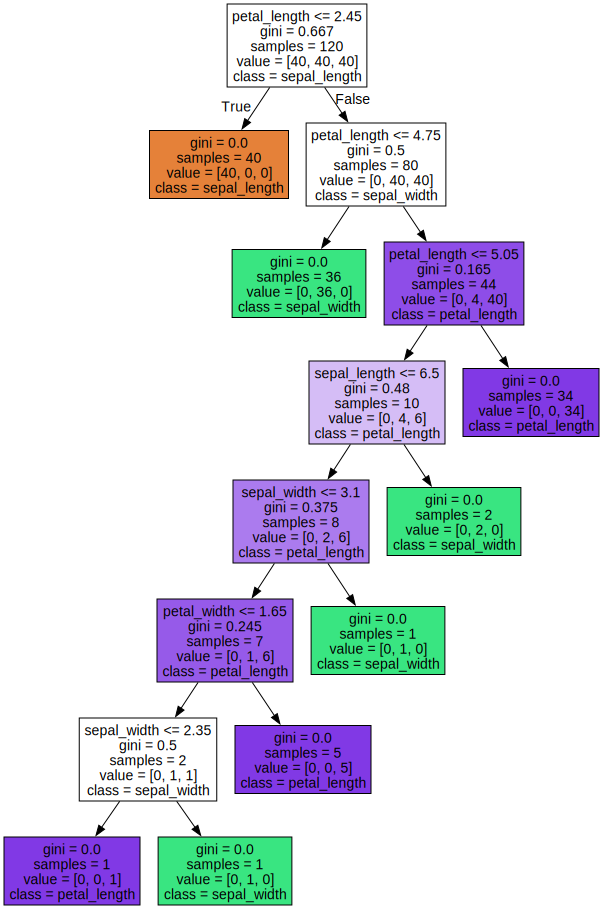

In [36]:
import graphviz as gz

gz.Source.from_file("./iris_dt_model.dot")
# 보라색은 아직 분리가 안된 것
# 가장 많이 값을 준 class_names가 찍힘, 동일한 경우 앞선 이름이 나옴

### [4] 모델 평가 <hr>

In [37]:
train_score = model.score(X_train, y_train)
test_score = model.score(x_test, y_test)

print(f'[Train] : {train_score}, [Test] : {test_score}')

[Train] : 1.0, [Test] : 0.9333333333333333


### [5] 문제 해결 및 성능 향상 즉, 튜닝 <hr>
- 원인 예상
    - 데이터 셋 부족 => cv
    - DT의 여러가지 하이퍼 파라미터 기본값으로만 사용 => 다양한 값 조절
- 해결 방법
    - 2개의 원인을 한꺼번에 해결하기 위해서 GridSearchCV

In [38]:
# 모듈 로딩
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [48]:
# 모델 조합 조건
# cv => 기본 5, ...
# DT의 하이퍼 파라미터 => max_depth, ..
dt_model = DecisionTreeClassifier()
n_cv = 5
params = {'criterion' : ['gini', 'entropy', 'log_loss'],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': range(1, 31)    
}

# 하이퍼 파라미터 조합된 모델 생성 후 교차검증 데이터셋으로 학습 진행해주는 인스턴스
gs = GridSearchCV(dt_model, param_grid=params, cv=n_cv,)

In [49]:
# 조합된 모델들의 학습 진행
result = gs.fit(X_train, y_train)

In [50]:
# 결과 확인
result

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': range(1, 31),
                         'min_samples_split': [2, 4, 6]})

In [53]:
# 학습 후 저장된 모델 파라미터 확인
# 교차학습 결과
cv_resultsDF = pd.DataFrame(gs.cv_results_)
cv_resultsDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000793,0.000236,0.000510,0.000139,gini,5,1,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.916667,0.958333,0.958333,0.958333,0.958333,0.026352,11
1,0.000603,0.000062,0.000501,0.000114,gini,5,1,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.916667,0.916667,0.958333,0.958333,0.916667,0.933333,0.020412,803
2,0.000618,0.000085,0.000419,0.000021,gini,5,1,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.916667,0.958333,0.958333,0.958333,0.950000,0.016667,32
3,0.000688,0.000178,0.000462,0.000097,gini,5,2,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.916667,0.916667,0.958333,0.958333,0.958333,0.941667,0.020412,63
4,0.000550,0.000038,0.000395,0.000009,gini,5,2,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.916667,0.916667,0.958333,0.958333,0.958333,0.941667,0.020412,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.000505,0.000013,0.000374,0.000002,log_loss,15,29,4,"{'criterion': 'log_loss', 'max_depth': 15, 'mi...",0.958333,0.916667,0.958333,0.916667,0.958333,0.941667,0.020412,63
806,0.000588,0.000080,0.000484,0.000133,log_loss,15,29,6,"{'criterion': 'log_loss', 'max_depth': 15, 'mi...",0.958333,0.916667,0.958333,0.916667,0.958333,0.941667,0.020412,63
807,0.000561,0.000052,0.000400,0.000012,log_loss,15,30,2,"{'criterion': 'log_loss', 'max_depth': 15, 'mi...",0.958333,0.916667,0.958333,0.916667,0.958333,0.941667,0.020412,63
808,0.000581,0.000040,0.000459,0.000027,log_loss,15,30,4,"{'criterion': 'log_loss', 'max_depth': 15, 'mi...",0.958333,0.916667,0.958333,0.916667,0.958333,0.941667,0.020412,63


In [58]:
# 조합된 모델 중 최고의 성능을 내는 하이퍼파라미터 값
gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [59]:
# 조합된 모델 중 최고의 성능을 내는 모델 인스턴스
my_best_model = gs.best_estimator_

In [60]:
# 조합된 모델 중 최고의 점수
gs.best_score_

0.9666666666666668

### [6] 학습 및 튜닝 후 모델 저장 <hr>
- 다른 파일에서 활용이 가능한 파일 형태로 저장
- 웹/앱 원하는 곳에서 활용 가능
- scikit-learn에서는 pickle 포맷으로 저장
- joblib 모듈에 해당 기능 포함되어 있음

In [63]:
import joblib
import os

In [69]:
# 모델 저장
model_dir='../model'
model_filename=model_dir+'/iris_dt.pkl'

# 저장 폴더 존재여부 확인 후 저장
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [70]:
# 모델 파일을 지정된 경로에 저장
joblib.dump(my_best_model, model_filename)

['../model/iris_dt.pkl']